In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet, LarsCV, Lars, OrthogonalMatchingPursuitCV, OrthogonalMatchingPursuit
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import f_classif, f_regression
from sklearn.impute import KNNImputer, MissingIndicator
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor

from utils import *



In [2]:
df = pd.read_csv("kaggle_data/pred_crim_train.csv", index_col = 'Id')
df.head()

,Expected,НЕВЕРОТН.1..Невероятные.приключения.итальянцев.в.России,ТЕЛОХРАН.2..Телохранитель,КАВКАЗСК.3..Кавказская.пленница.или.Новые.приключения.Шурика,ПТЫЙ_ЭЛЕ.4..Пятый.элемент,ТЕРМИНАТ.5..Терминатор,КРЕПКИЙ.6..Крепкий.орешек,ПОЛИЦ_АК.7..Полицейская.академия,ЧУЖИЕ.8..Чужие,КРОКОДИЛ.9..Крокодил.Данди,...,РУКА_ПЕР.191.Рука.переплетение.пальцев.рук...ведущая,РУКА_ИМИ.192.Рука.имитация.аплодисментов...ведущая,РУКА_СКР.193.Рука.скрещивание.рук.на.груди...ведущая,HОГА.194.Hога...ведущая,ГЛАЗ.195.Глаз...ведущая,РУКОЙ_ПИ.196.Рука.которой.пишут,ПЕРЕУЧИВ.197.Переучивали.ли.писать.если.левша,САМООПPЕ.198.Самоопpеделение.пpавша.левша,БОК_ПРЕД.199.Бок.на.котором.предпочитают.спать,ГЛАЗ_У_В.200.Глаз.который.обычно.шире.открыт
Id,,,,,,,,,,,,,,,,,,,,,
807,10.0,9.0,12.0,NaN,6.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,9.0,7.0,7.0,7.0,10.0,9.0,10.0,9.0,12.0,8.0,...,2.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0
764,12.0,7.5,8.0,12.0,8.0,6.5,7.0,11.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,3.0,2.0
510,8.0,7.0,6.5,7.0,7.0,5.0,6.5,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,6.0,12.0,6.0,11.0,6.5,1.0,5.0,1.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def preprocessing(x: float) -> int:
    x = np.round(x)
    if x <= 1:
        return 1
    if x >= 12:
        return 12
    return x

# for column in df.columns:
#     df[column] = df[column].apply(preprocessing)

# for column in df.columns:
#     df[column] = df[column].apply(lambda x: np.round(df[column].mean()) if np.isnan(x) else x)
    

In [12]:
prep = Preprocessor(1, 0)
prep_df = prep.fit_transform(df, 'Expected')
X, y = prep_df.drop('Expected', axis = 1), prep_df.Expected

len means: 161


In [13]:
X = prep.fill_gaps(X)

#imputer = KNNImputer(n_neighbors=50, weights = 'distance')
#X = imputer.fit_transform(X)

In [14]:
X = np.round(X)

In [15]:
X

array([[ 9., 12.,  8., ...,  1.,  2.,  2.],
       [ 7.,  7.,  7., ...,  1.,  1.,  2.],
       [ 8.,  8., 12., ...,  1.,  3.,  2.],
       ...,
       [ 7.,  8.,  7., ...,  1.,  2.,  2.],
       [ 6.,  5.,  7., ...,  1.,  2.,  2.],
       [ 8.,  5.,  9., ...,  1.,  3.,  2.]])

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.to_numpy().reshape(-1, 1))
y = y.reshape(len(y))

In [179]:
thrs = [0.1, 0.05, 0.01, 0.001]
for thr in thrs:
    print(f"{thr}: {(f_classif(X, y)[1] < thr).sum()}") 
#  f_classif   f_regression

0.1: 63
0.05: 46
0.01: 32
0.001: 19


In [180]:
threshold = 0.01
selected_cols = f_classif(X, y)[1]
X = X[:,selected_cols < threshold]

# pca = PCA(n_components=sum(selected_cols < threshold), svd_solver = 'full')
# X = pca.fit_transform(X)

In [181]:
X.shape

(1000, 19)

In [182]:
#gb = GradientBoostingRegressor(random_state = 42)
#svr = SVR()
#rf = RandomForestRegressor(random_state = 42)
#lr = LinearRegression()
rlr = RidgeCV(alphas = np.arange(1, 1000, 0.01)) ## <===================================================================== GOOD RESULTS
#llr = LassoCV(alphas = np.arange(10000, 1000000))
#en = ElasticNet()
#lars = Lars()
#OMP = OrthogonalMatchingPursuitCV(cv = 10, normalize=False)
#knn = KNeighborsRegressor()

#nn = MLPRegressor(max_iter=5000, random_state=42)
# gb.score(X, y)

In [183]:
# fitter = Fitter([RandomForestRegressor(random_state = 42), GradientBoostingRegressor(random_state = 42), SVR()])

In [184]:
# no ANOVA
# fitter.cross_val(X, y, cv = 10)

In [189]:
model = RidgeCV(alphas = np.arange(1, 1000, 0.01))

model.fit(X, y)
# y = np.round(y).to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)

# from sklearn.metrics import mean_squared_error

# mean_squared_error(y_test, model.predict(X_test), squared=False)

RidgeCV(alphas=array([  1.  ,   1.01,   1.02, ..., 999.97, 999.98, 999.99]))

In [190]:
mean_squared_error(y_scaler.inverse_transform(y_test.reshape(-1, 1)), y_scaler.inverse_transform(model.predict(X_test).reshape(-1, 1)), squared=False)

1.884202391042143

In [191]:
model.alpha_

143.44000000000014

In [44]:
# nn params
params = {
    'hidden_layer_sizes' : [(20,),(50,),(80,),(110,),(150,),(180,),],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'alpha' : np.linspace(0.0001, 1, 100)
}

In [46]:
clf_nn = RandomizedSearchCV(MLPRegressor(max_iter=5000, random_state=42), params, cv=10, n_jobs=-1, verbose=1, n_iter = 100, scoring = my_scoring)
clf_nn.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=MLPRegressor(max_iter=5000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.6...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
                                        'hidden_layer_sizes': [(20,), (50,),
                               

In [47]:
print(clf_nn.best_params_)
print(clf_nn.best_score_)
print(clf_nn.best_estimator_)

{'hidden_layer_sizes': (80,), 'alpha': 0.6162, 'activation': 'logistic'}
-1.911643400355673
MLPRegressor(activation='logistic', alpha=0.6162, hidden_layer_sizes=(80,),
             max_iter=5000, random_state=42)


In [48]:
# nn params
params = {
    'hidden_layer_sizes' : [(80,),(80, 10),(80, 20),(80, 30),(80, 40),(80, 50),],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'alpha' : np.linspace(0.0001, 1, 100)
}

In [49]:
clf_nn = RandomizedSearchCV(MLPRegressor(max_iter=5000, random_state=42), params, cv=10, n_jobs=-1, verbose=1, n_iter = 100, scoring = my_scoring)
clf_nn.fit(X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=MLPRegressor(max_iter=5000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.6...
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
                                        'hidden_layer_sizes': [(80,), (80, 10),
                                                               (80, 20),
                            

In [50]:
print(clf_nn.best_params_)
print(clf_nn.best_score_)
print(clf_nn.best_estimator_)

{'hidden_layer_sizes': (80,), 'alpha': 1.0, 'activation': 'logistic'}
-1.911030598725069
MLPRegressor(activation='logistic', alpha=1.0, hidden_layer_sizes=(80,),
             max_iter=5000, random_state=42)


In [475]:
# lr params
params = {
    'fit_intercept' : [False, True]
}

In [450]:
clf_lr = RandomizedSearchCV(LinearRegression(), params, cv=10, n_jobs=-1, verbose=1, n_iter = 1000, scoring = my_scoring)
clf_lr.fit(X, y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=1000. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_iter=1000, n_jobs=-1,
                   param_distributions={'fit_intercept': [False, True]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [451]:
print(clf_lr.best_params_)
print(clf_lr.best_score_)
print(clf_lr.best_estimator_)

{'fit_intercept': False}
-1.9157829445616508
LinearRegression(fit_intercept=False)


In [653]:
cv_res = cross_validate(model, X, y, cv = 10, scoring = my_scoring)
conf_interval = stats.norm.interval(0.99, loc=cv_res['test_score'].mean(), scale=cv_res['test_score'].std()/np.sqrt(len(cv_res['test_score'])))        
print(f'bottom border = {conf_interval[0]}; mean = {cv_res["test_score"].mean()}; top border = {conf_interval[1]}')

bottom border = -2.009607389254026; mean = -1.9157580874043485; top border = -1.821908785554671


In [200]:
# svc params
params = {
    'C' : np.arange(0.001, 0.05, 0.005),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : np.arange(1, 10),
    'gamma' : ['scale', 'auto']
    # 'coef0' : np.arange(0, 5, 0.3)
}

In [201]:
clf_svm = RandomizedSearchCV(SVR(), params, cv=10, n_jobs=-1, verbose=1, n_iter = 1000, scoring = my_scoring)
clf_svm.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 720 is smaller than n_iter=1000. Running 720 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 10 folds for each of 720 candidates, totalling 7200 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_iter=1000, n_jobs=-1,
                   param_distributions={'C': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046]),
                                        'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [202]:
print(clf_svm.best_params_)
print(clf_svm.best_score_)
print(clf_svm.best_estimator_)

{'kernel': 'linear', 'gamma': 'scale', 'degree': 1, 'C': 0.006}
-1.9311380942354135
SVR(C=0.006, degree=1, kernel='linear')


In [386]:
# rm params
params = {
    "n_estimators": [50, 100, 150, 200, 250],
    "min_samples_split": np.linspace(0.1, 0.5, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_depth": [3, 5, 8, 11, 14],
    # "max_features": ["log2","sqrt", "auto"],
    "bootstrap": [False, True],
    # "criterion": ['gini', 'entropy'],
}

In [387]:
clf_rf = RandomizedSearchCV(RandomForestRegressor(random_state = 42), params, cv=10, n_jobs=-1, verbose=1, n_iter = 1000, scoring = my_scoring)
clf_rf.fit(X, y)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [3, 5, 8, 11, 14],
                                        'min_samples_leaf': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]),
                                        'min_samples_split': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]),
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=1)

In [388]:
print(clf_rf.best_params_)
print(clf_rf.best_score_)
print(clf_rf.best_estimator_)

{'n_estimators': 100, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_depth': 5, 'bootstrap': True}
-1.9801459655311078
RandomForestRegressor(max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1,
                      random_state=42)


# GB (GOOD RESULTS TOO)

In [43]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    y_true = y_scaler.inverse_transform(y_true.reshape(-1, 1)).reshape(len(y_true))
    y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(len(y_pred))
    return mean_squared_error(y_true, y_pred, squared=False)

my_scoring = make_scorer(rmse, greater_is_better=False)

params = {
    # "loss":["deviance"],
    # "learning_rate": [0.01, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_depth": [3, 5, 8, 11, 14],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.65, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[50, 100, 150, 200, 250]
    }

In [363]:
clf_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state = 42), params, cv=10, n_jobs=-1, verbose=1, n_iter = 1000, scoring = my_scoring)
clf_gb.fit(X, y)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'max_depth': [3, 5, 8, 11, 14],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]),
                                        'min_samples_split': array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 ]),
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'subsample': [0.5, 0.65, 0.8, 0.85, 0.9,
                                                      0.95, 1.0]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   v

In [364]:
print(clf_gb.best_params_)
print(clf_gb.best_score_)
print(clf_gb.best_estimator_)

{'subsample': 1.0, 'n_estimators': 150, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'friedman_mse'}
-1.9372808612627428
GradientBoostingRegressor(max_depth=5, max_features='log2',
                          min_samples_leaf=0.1, min_samples_split=0.5,
                          n_estimators=150, random_state=42)


***

# Predict

In [192]:
df_test = pd.read_csv("kaggle_data/pred_crim_test.csv", index_col = 'Id')
df_test_index = df_test.index
df_test = prep.transform(df_test, bTrain=False)
df_test = prep.fill_gaps(df_test)
#df_test = imputer.transform(df_test)
df_test = np.round(df_test)
df_test.shape

(1199, 161)

In [193]:
df_test = scaler.transform(df_test)
df_test = df_test[:,selected_cols < threshold]
df_test.shape

(1199, 19)

In [194]:
answers_array = model.predict(df_test)

In [195]:
answers_array = y_scaler.inverse_transform(answers_array.reshape(-1, 1))

In [196]:
answers_array = answers_array.reshape(len(answers_array))
answers_array

array([8.25039543, 8.62280137, 9.10233066, ..., 7.70379593, 8.93145008,
       8.93317111])

In [83]:
f = lambda x: np.round(x) if np.abs(x - np.round(x)) < 0.25 else x

new_ans = np.array([f(a) for a in answers_array])

 

In [84]:
new_ans

array([8.        , 8.78975622, 9.61856336, ..., 7.61649722, 9.        ,
       8.74424746])

In [203]:
answers = pd.DataFrame(answers_array, columns = ['Predicted'], index = df_test_index)
answers.to_csv('answers.csv')

***

In [5]:
df = pd.read_csv("kaggle_data/pred_crim_train.csv", index_col = 'Id')
df_test = pd.read_csv("kaggle_data/pred_crim_test.csv", index_col = 'Id')

In [6]:
thrs = np.arange(0, 1, 0.01)
res = []
for thr in thrs:
    nan_columns = []
    for column in df.columns[1:]:
        nan_ratio = np.isnan(df[column]).sum() / (len(df)-1)
        if nan_ratio > thr:
            nan_columns.append(column)
    res.append(len(nan_columns))
rest = []
for thr in thrs:
    nan_columns = []
    for column in df_test.columns:
        nan_ratio = np.isnan(df_test[column]).sum() / len(df_test)
        if nan_ratio > thr:
            nan_columns.append(column)
    rest.append(len(nan_columns))

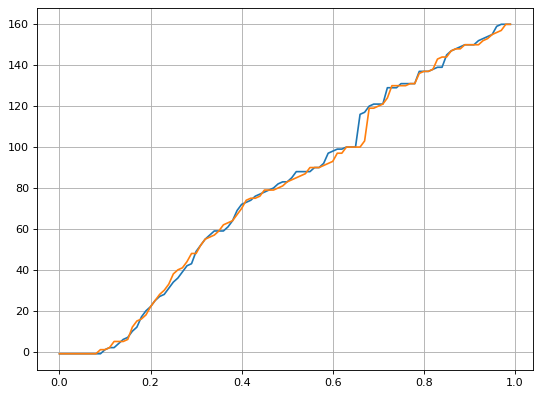

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.grid()
plt.plot(thrs, 160 - np.array(res))
plt.plot(thrs, 160 - np.array(rest))

In [117]:
svm_a = pd.read_csv('answers (35).csv').Predicted.to_numpy()
lr_a = pd.read_csv('answers (36).csv').Predicted.to_numpy()
nn_a = pd.read_csv('answers (44).csv').Predicted.to_numpy()

In [118]:
not (np.array([8.00874283, 8.10829568, 8.07553591]) < 8.1).all()

True

In [119]:
def two_side(arr: np.array, mean: float) -> bool:
    return not (arr < mean).all() and not (arr > mean).all()

In [124]:
ans = []
for values in zip(svm_a, lr_a, nn_a):
    values = np.array(values)
    meanv = np.mean(values)
    idx = np.abs(values - np.round(meanv)).argmin()
    # # 1st 
    # if two_side(values, np.round(meanv)):
    #     ans.append(np.round(meanv))
    # # 2nd
    # # elif np.abs(values[idx] - np.round(meanv)) < 0.1:
    # #     ans.append(np.round(meanv))
    # # 3rd
    # else:
    ans.append(values[idx])
    print(values, np.round(meanv))

[8.00874283 8.10829568 8.07553591] 8.0
[9.18980162 8.78975622 8.94013814] 9.0
[9.4988321  9.61856336 9.70044883] 10.0
[8.39397092 8.31239932 8.37580126] 8.0
[11.33518586 11.09699123 11.05799831] 11.0
[7.93902085 8.27106014 8.25146341] 8.0
[10.04268543  9.8460318   9.9831378 ] 10.0
[8.66265159 8.38433743 8.39145753] 8.0
[9.63415829 9.50829897 9.62679528] 10.0
[7.27674419 7.15591677 7.03387648] 7.0
[8.0611947  8.11852162 8.04168237] 8.0
[9.78884326 9.49730271 9.56918305] 10.0
[7.9054699  7.98124126 7.83187561] 8.0
[8.3475427  8.30328444 8.25915844] 8.0
[8.51191677 8.55599094 8.53436369] 9.0
[7.95858987 8.20419004 8.1324366 ] 8.0
[10.1094347   9.89727786  9.98123026] 10.0
[9.28818703 8.99092921 9.08018326] 9.0
[6.61692561 6.99423657 6.98975049] 7.0
[9.72660391 9.56382023 9.66438634] 10.0
[7.96602128 8.00455961 7.97485922] 8.0
[9.99029377 9.96466534 9.95460834] 10.0
[7.212288   7.37420374 7.28922727] 7.0
[8.89945542 8.65339618 8.68243703] 9.0
[7.96779756 8.23354058 8.06657494] 8.0
[10.4694

In [125]:
ans = np.array(ans)
ans

array([8.00874283, 8.94013814, 9.70044883, ..., 7.61649722, 8.97434196,
       8.7847072 ])

In [122]:
answers = pd.DataFrame(ans, columns = ['Predicted'], index = df_test_index)
answers.to_csv('answers.csv')